<a href="https://colab.research.google.com/github/JanPastorek/1-AIN-152-22-LinearAlgebra/blob/main/6_linear_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear transformations 

This notebook shows how 2×2 matrices act on the plane. Gray lines are the original grid; colored lines are the transformed grid. Black arrows are the standard basis (e1,e2); colored arrows are their images (A e1, A e2).

In [2]:
import numpy as np
from IPython.display import display, Markdown

# Student notebook cell (index 0)
# Visual introduction to linear transformations: rotations, projections, scaling, shear, reflection
import matplotlib.pyplot as plt

def draw_transformation(A, title, ax, grid_lim=5, n_lines=21):
    # draw original grid
    ys = np.linspace(-grid_lim, grid_lim, 201)
    xs = np.linspace(-grid_lim, grid_lim, n_lines)
    for x in xs:
        pts = np.vstack([np.full_like(ys, x), ys])
        ax.plot(pts[0], pts[1], color='gray', linewidth=0.6)
    for y in xs:
        pts = np.vstack([xs*0 + y, xs])
        pts = np.vstack([np.linspace(-grid_lim, grid_lim, 201), np.full(201, y)])  # horizontal
        ax.plot(pts[0], pts[1], color='gray', linewidth=0.6)

    # transform grid lines and plot
    for x in np.linspace(-grid_lim, grid_lim, 11):
        pts = np.vstack([np.full_like(ys, x), ys])
        t = A @ pts
        ax.plot(t[0], t[1], color='C0', linewidth=0.9)
    for y in np.linspace(-grid_lim, grid_lim, 11):
        pts = np.vstack([np.linspace(-grid_lim, grid_lim, 201), np.full(201, y)])
        t = A @ pts
        ax.plot(t[0], t[1], color='C0', linewidth=0.9)

    # basis vectors and their images
    e1 = np.array([1., 0.])
    e2 = np.array([0., 1.])
    Ae1 = A @ e1
    Ae2 = A @ e2

    # arrows: original in gray/black, transformed in red/blue
    ax.arrow(0, 0, e1[0], e1[1], head_width=0.12, length_includes_head=True, color='k', linewidth=1)
    ax.arrow(0, 0, e2[0], e2[1], head_width=0.12, length_includes_head=True, color='k', linewidth=1)
    ax.arrow(0, 0, Ae1[0], Ae1[1], head_width=0.12, length_includes_head=True, color='C1', linewidth=2)
    ax.arrow(0, 0, Ae2[0], Ae2[1], head_width=0.12, length_includes_head=True, color='C2', linewidth=2)

    # unit square
    square = np.array([[0,1,1,0,0],[0,0,1,1,0]])
    ax.plot(square[0], square[1], color='k', alpha=0.3)
    Tsq = A @ square
    ax.plot(Tsq[0], Tsq[1], color='C3', linewidth=2)

    # labels and matrix text
    ax.set_title(title, fontsize=10)
    
    # display matrix in a nicer format that can be displayed with plt
    mat_text = f"A = \n [{A[0,0]:+.2f}, {A[0,1]:+.2f} \n {A[1,0]:+.2f}, {A[1,1]:+.2f}]"
    
    
    
    
    ax.text(0.02, 0.98, mat_text, transform=ax.transAxes, va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax.set_aspect('equal', 'box')
    # set limits to include transformed content
    # compute transformed corners to set a safe limit
    corners = np.array([[-grid_lim, -grid_lim], [-grid_lim, grid_lim], [grid_lim, -grid_lim], [grid_lim, grid_lim]]).T
    tcorn = A @ corners
    all_x = np.hstack([corners[0], tcorn[0]])
    all_y = np.hstack([corners[1], tcorn[1]])
    span = max(all_x.max()-all_x.min(), all_y.max()-all_y.min())
    cx = (all_x.max()+all_x.min())/2
    cy = (all_y.max()+all_y.min())/2
    pad = 0.6
    ax.set_xlim(cx - span/2 - pad, cx + span/2 + pad)
    ax.set_ylim(cy - span/2 - pad, cy + span/2 + pad)
    ax.grid(False)
    ax.tick_params(left=True, bottom=True, labelsize=8)
    
    # determine determinant
    det = np.linalg.det(A)
    det_text = f"det(A) = {det:.2f}"
    ax.text(0.98, 0.02, det_text, transform=ax.transAxes, va='bottom', ha='right', fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

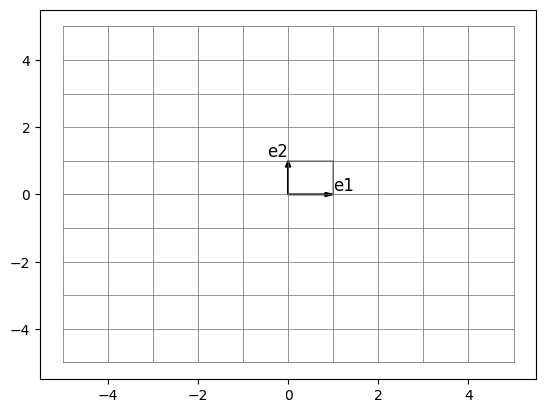

In [3]:

grid_lim=5
n_lines=11

# draw original grid
ys = np.linspace(-grid_lim, grid_lim, 201)
xs = np.linspace(-grid_lim, grid_lim, n_lines)
for x in xs:
    pts = np.vstack([np.full_like(ys, x), ys])
    plt.plot(pts[0], pts[1], color='gray', linewidth=0.6)
for y in xs:
    pts = np.vstack([xs*0 + y, xs])
    pts = np.vstack([np.linspace(-grid_lim, grid_lim, 201), np.full(201, y)])  # horizontal
    plt.plot(pts[0], pts[1], color='gray', linewidth=0.6)

# basis vectors and their images
e1 = np.array([1., 0.])
e2 = np.array([0., 1.])

# arrows: original in gray/black, transformed in red/blue, labelled
plt.arrow(0, 0, e1[0], e1[1], head_width=0.12,
            length_includes_head=True, color='k', linewidth=1, label='e1')
plt.arrow(0, 0, e2[0], e2[1], head_width=0.12,
            length_includes_head=True, color='k', linewidth=1, label='e2')

# show labels
plt.text(e1[0], e1[1], 'e1', fontsize=12, color='k', ha='left', va='bottom')
plt.text(e2[0], e2[1], 'e2', fontsize=12, color='k', ha='right', va='bottom')



# unit square
square = np.array([[0,1,1,0,0],[0,0,1,1,0]])
plt.plot(square[0], square[1], color='k', alpha=0.3)

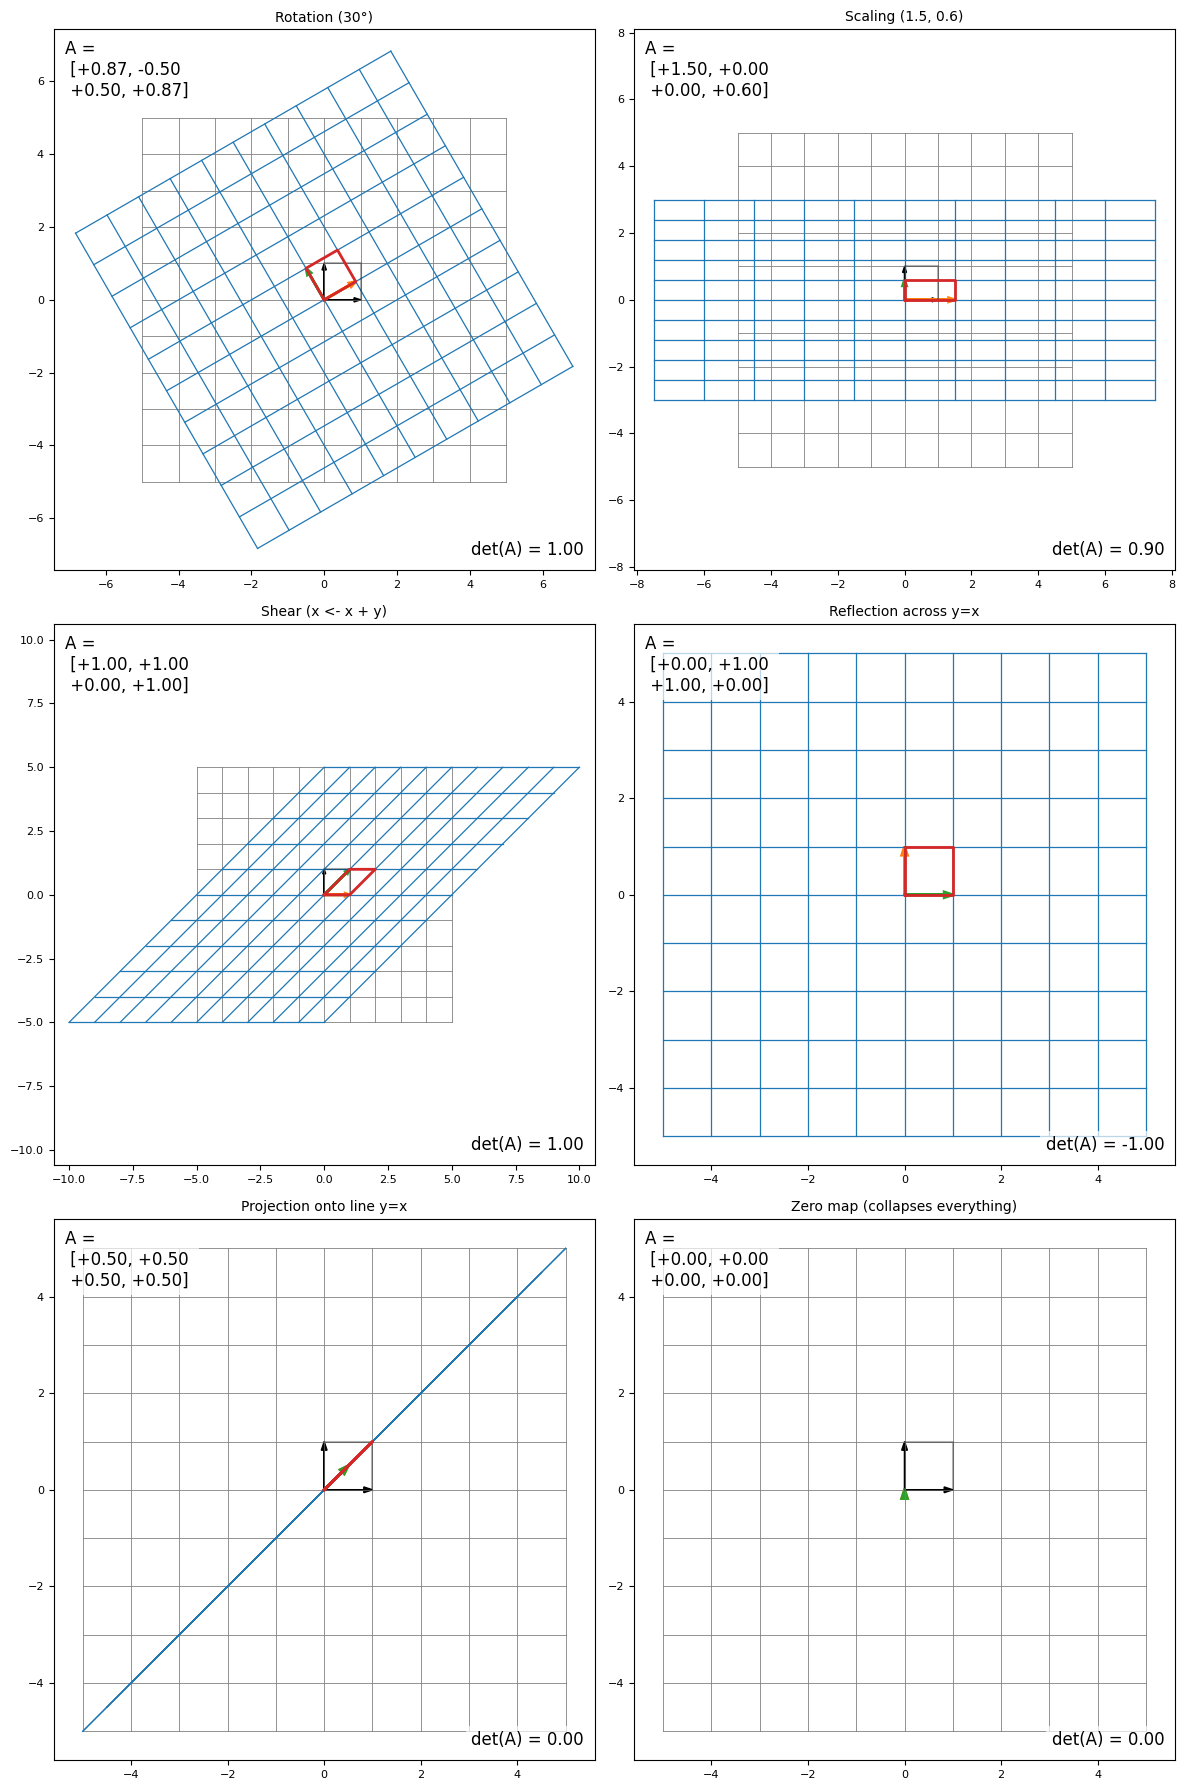

In [4]:
# Define example matrices
theta = np.deg2rad(30)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])         # rotation by 30°
S = np.array([[1.5, 0.0],
              [0.0, 0.6]])                             # scaling
H = np.array([[1.0, 1.0],
              [0.0, 1.0]])                             # shear
Ref = np.array([[0.0, 1.0],
                [1.0, 0.0]])                           # reflection across y=x
# projection onto the line spanned by [1, 1]

u = np.array([1., 1.])
P = np.outer(u, u) / (u @ u)

matrices = [
    (R, "Rotation (30°)"),
    (S, "Scaling (1.5, 0.6)"),
    (H, "Shear (x <- x + y)"),
    (Ref, "Reflection across y=x"),
    (P, "Projection onto line y=x"),
    (np.array([[0.0, 0.0], [0.0, 0.0]]), "Zero map (collapses everything)")
]

fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.flatten()
for ax, (A, title) in zip(axes, matrices):
    draw_transformation(A, title, ax, grid_lim=5, n_lines=11)

plt.tight_layout()
plt.show()

Notes:
- Rotations preserve lengths and orientation (determinant = +1).
- Reflections preserve lengths but reverse orientation (determinant = -1).
- Projections are singular (rank 1 here): they collapse the plane onto a line.
- The determinant measures area scaling; det=0 means collapse to lower dimension.

Experiment by changing matrices above to build intuition.

## Rounding errors

the following matrix clearly has determinant 19, but ...

In [ ]:


A = [[2, 1, 3], [0, -1, 4], [5,2,0]]
np.linalg.det(A)

np.float64(18.999999999999996)